In [346]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [347]:
df = pd.read_csv('train_data.csv')
df1 = pd.read_csv('test_data.csv')

In [348]:
df.head()

UID Feature_1  Feature_2  Feature_3  Feature_4  Feature_5 Feature_6  \
0    1         S         45         11         39          1      C124   
1    2         S         74         35         36          2       NaN   
2    3         S         62         38        100          3       NaN   
3    4         S         59         94         -3          3       NaN   
4    5         S         26         72         33          3       NaN   

   Feature_7  Feature_8          Feature_9  Feature_10  Feature_11 Feature_12  \
0         45         30             113043        45.5           0   56OGNNnQ   
1         14         99              28425        23.0           0   lpe6DkCG   
2         65         47  STON/O 2. 3101293        32.0           0   H7MHSxHc   
3         17         26             350025        26.0           0   AFt8biyX   
4         45         17             347082         6.0           2   9O4X1MIW   

   Feature_13  Feature_14  Feature_15  Feature_16  Target  
0           0         332     28.5000           2       0  
1           0         734     13.0000           1       0  
2           0         383      7.9250           2       0  
3           1         705      7.8542           1       0  
4           4         814     31.2750           2       0

In [349]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   UID         712 non-null    int64  
 1   Feature_1   710 non-null    object 
 2   Feature_2   712 non-null    int64  
 3   Feature_3   712 non-null    int64  
 4   Feature_4   712 non-null    int64  
 5   Feature_5   712 non-null    int64  
 6   Feature_6   159 non-null    object 
 7   Feature_7   712 non-null    int64  
 8   Feature_8   712 non-null    int64  
 9   Feature_9   712 non-null    object 
 10  Feature_10  572 non-null    float64
 11  Feature_11  712 non-null    int64  
 12  Feature_12  712 non-null    object 
 13  Feature_13  712 non-null    int64  
 14  Feature_14  712 non-null    int64  
 15  Feature_15  712 non-null    float64
 16  Feature_16  712 non-null    int64  
 17  Target      712 non-null    int64  
dtypes: float64(2), int64(12), object(4)
memory usage: 100.3+ KB


In [350]:
df.nunique().sort_values()

Target          2
Feature_16      2
Feature_1       3
Feature_5       3
Feature_13      7
Feature_11      7
Feature_10     83
Feature_6     117
Feature_4     119
Feature_2     120
Feature_3     120
Feature_7     122
Feature_8     123
Feature_15    220
Feature_9     558
Feature_14    712
Feature_12    712
UID           712
dtype: int64

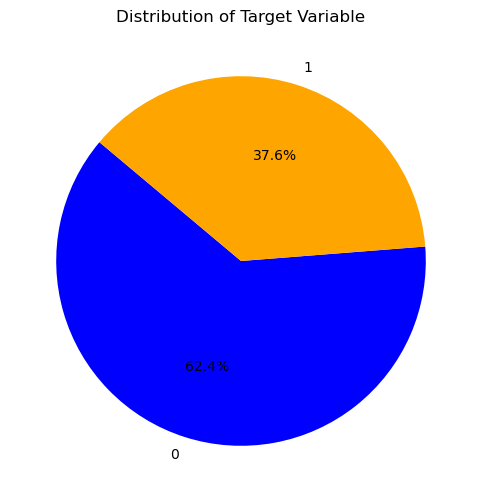

In [266]:
#Distribution of target variable
target_counts = df['Target'].value_counts()
plt.figure(figsize=(6,6))  
plt.pie(target_counts, labels=target_counts.index, autopct='%1.1f%%', startangle=140, colors=['blue', 'orange'])
plt.title('Distribution of Target Variable')
plt.show()

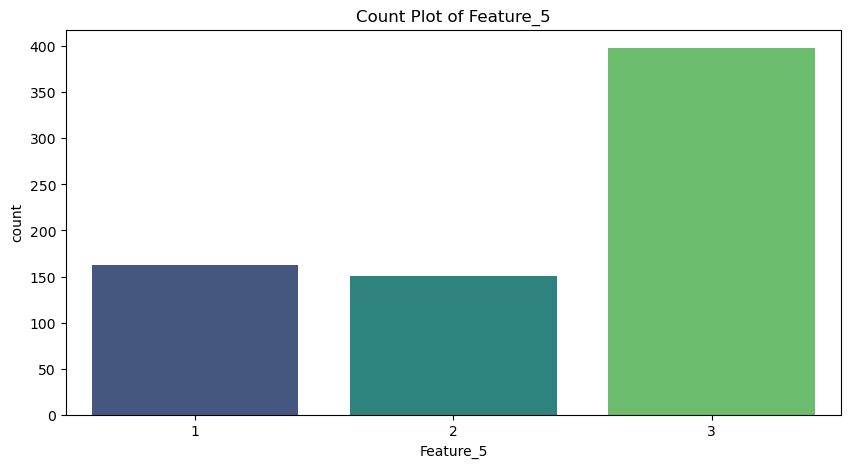

In [267]:
plt.figure(figsize=(10,5))
sns.countplot(x=df['Feature_5'], palette='viridis')
plt.title('Count Plot of Feature_5')
plt.xticks() 
plt.show()

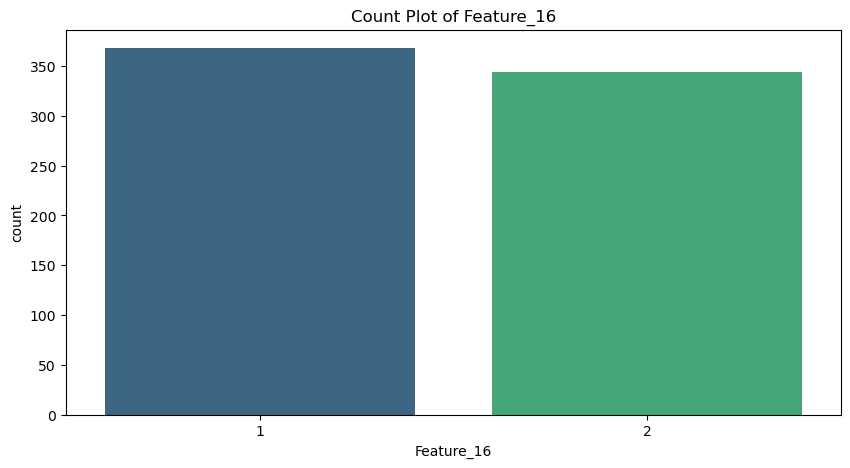

In [268]:
plt.figure(figsize=(10,5))
sns.countplot(x=df['Feature_16'], palette='viridis')
plt.title('Count Plot of Feature_16')
plt.xticks() 
plt.show()

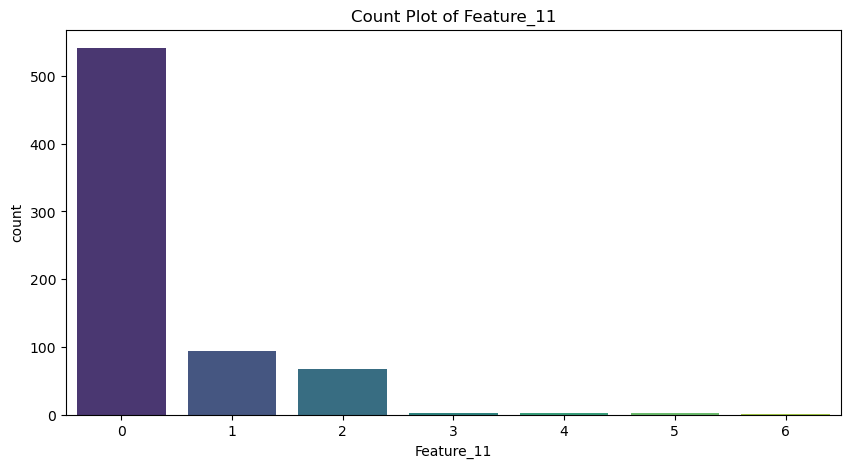

In [269]:
plt.figure(figsize=(10,5))
sns.countplot(x=df['Feature_11'], palette='viridis')
plt.title('Count Plot of Feature_11')
plt.xticks() 
plt.show()

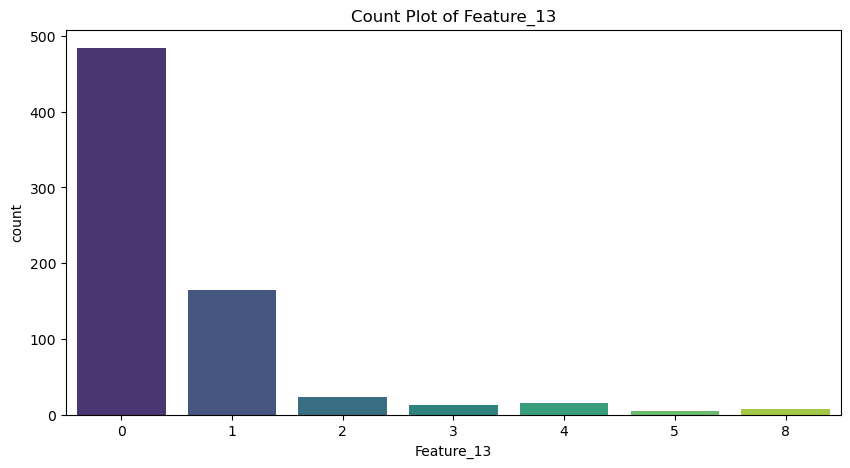

In [270]:
plt.figure(figsize=(10,5))
sns.countplot(x=df['Feature_13'], palette='viridis')
plt.title('Count Plot of Feature_13')
plt.xticks() 
plt.show()

In [351]:
df.isnull().sum()

UID             0
Feature_1       2
Feature_2       0
Feature_3       0
Feature_4       0
Feature_5       0
Feature_6     553
Feature_7       0
Feature_8       0
Feature_9       0
Feature_10    140
Feature_11      0
Feature_12      0
Feature_13      0
Feature_14      0
Feature_15      0
Feature_16      0
Target          0
dtype: int64

In [352]:
df.drop(['Feature_6','Feature_9','Feature_12'], axis=1,inplace=True)

In [353]:
df['Feature_10'] = df['Feature_10'].fillna(df['Feature_10'].mode()[0])

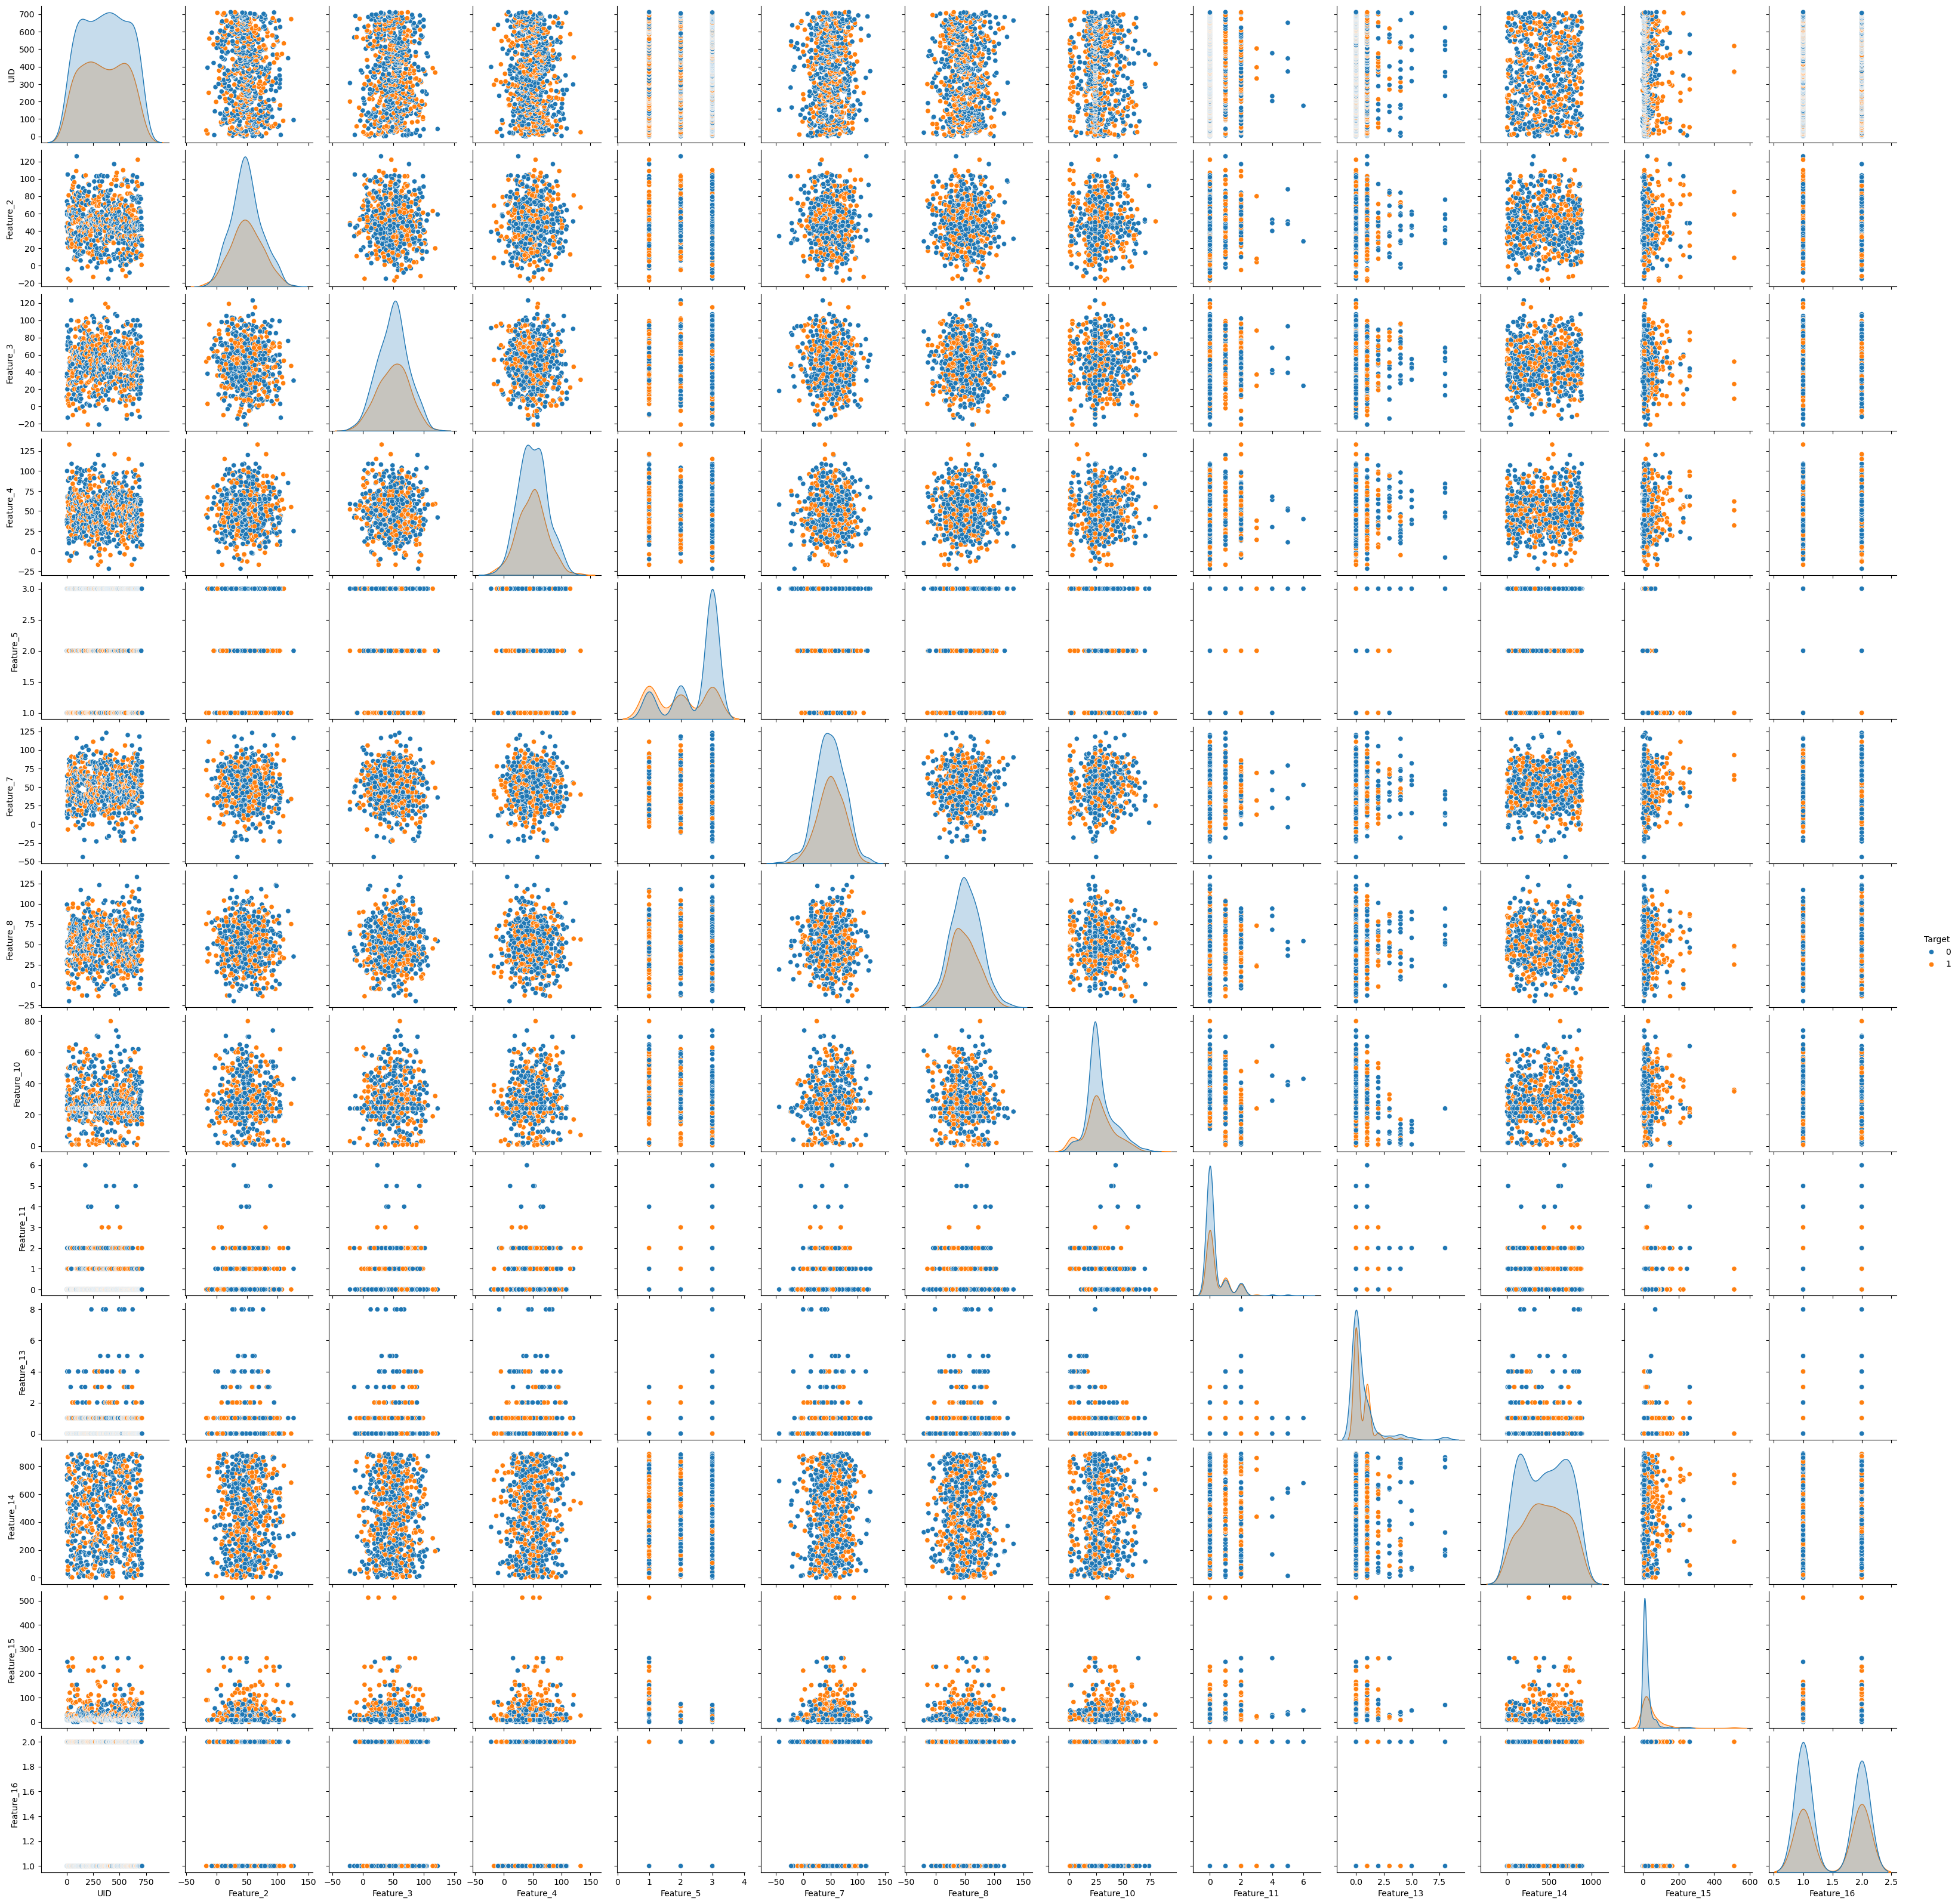

In [274]:
sns.pairplot(data=df, hue='Target')

In [354]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   UID         712 non-null    int64  
 1   Feature_1   710 non-null    object 
 2   Feature_2   712 non-null    int64  
 3   Feature_3   712 non-null    int64  
 4   Feature_4   712 non-null    int64  
 5   Feature_5   712 non-null    int64  
 6   Feature_7   712 non-null    int64  
 7   Feature_8   712 non-null    int64  
 8   Feature_10  712 non-null    float64
 9   Feature_11  712 non-null    int64  
 10  Feature_13  712 non-null    int64  
 11  Feature_14  712 non-null    int64  
 12  Feature_15  712 non-null    float64
 13  Feature_16  712 non-null    int64  
 14  Target      712 non-null    int64  
dtypes: float64(2), int64(12), object(1)
memory usage: 83.6+ KB


In [355]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Feature_1'] = le.fit_transform(df['Feature_1'])

In [356]:
df.head()

UID  Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_7  \
0    1          2         45         11         39          1         45   
1    2          2         74         35         36          2         14   
2    3          2         62         38        100          3         65   
3    4          2         59         94         -3          3         17   
4    5          2         26         72         33          3         45   

   Feature_8  Feature_10  Feature_11  Feature_13  Feature_14  Feature_15  \
0         30        45.5           0           0         332     28.5000   
1         99        23.0           0           0         734     13.0000   
2         47        32.0           0           0         383      7.9250   
3         26        26.0           0           1         705      7.8542   
4         17         6.0           2           4         814     31.2750   

   Feature_16  Target  
0           2       0  
1           1       0  
2           2       0  
3           1       0  
4           2       0

In [357]:
df['Feature_1'].astype('int32')

0      2
1      2
2      2
3      2
4      2
      ..
707    2
708    2
709    2
710    2
711    2
Name: Feature_1, Length: 712, dtype: int32

In [358]:
#Feature Derivation
df['Feature_2_3'] = df['Feature_2'] * df['Feature_3']
df['Feature_4_7'] = df['Feature_4'] * df['Feature_7']
df['Feature_8_14'] = df['Feature_8'] * df['Feature_14']

In [359]:
df['Feature_2_squared'] = df['Feature_2'] ** 2
df['Feature_3_squared'] = df['Feature_3'] ** 2
df['Feature_4_squared'] = df['Feature_4'] ** 2
df['Feature_7_squared'] = df['Feature_7'] ** 2
df['Feature_8_squared'] = df['Feature_8'] ** 2
df['Feature_14_squared'] = df['Feature_14'] ** 2

In [360]:
df['Feature_2_log1p'] = np.log1p(df['Feature_2'])
df['Feature_3_log1p'] = np.log1p(df['Feature_3'])
df['Feature_7_log1p'] = np.log1p(df['Feature_7'])
df['Feature_8_log1p'] = np.log1p(df['Feature_8'])
df['Feature_14_log1p'] = np.log1p(df['Feature_14'])

In [361]:
df.isnull().sum()

UID                    0
Feature_1              0
Feature_2              0
Feature_3              0
Feature_4              0
Feature_5              0
Feature_7              0
Feature_8              0
Feature_10             0
Feature_11             0
Feature_13             0
Feature_14             0
Feature_15             0
Feature_16             0
Target                 0
Feature_2_3            0
Feature_4_7            0
Feature_8_14           0
Feature_2_squared      0
Feature_3_squared      0
Feature_4_squared      0
Feature_7_squared      0
Feature_8_squared      0
Feature_14_squared     0
Feature_2_log1p       11
Feature_3_log1p       13
Feature_7_log1p       17
Feature_8_log1p       17
Feature_14_log1p       0
dtype: int64

In [362]:
df['Feature_2_log1p'] = df['Feature_2_log1p'].fillna(df['Feature_2_log1p'].mode()[0])

In [363]:
df['Feature_3_log1p'] = df['Feature_3_log1p'].fillna(df['Feature_3_log1p'].mode()[0])

In [364]:
df['Feature_7_log1p'] = df['Feature_7_log1p'].fillna(df['Feature_7_log1p'].mode()[0])

In [365]:
df['Feature_8_log1p'] = df['Feature_8_log1p'].fillna(df['Feature_8_log1p'].mode()[0])

In [366]:
df['Feature_2_3_inv'] = df['Feature_2'] / (df['Feature_3'] + 1)  
df['Feature_4_7_inv'] = df['Feature_4'] / (df['Feature_7'] + 1)
df['Feature_8_14_inv'] = df['Feature_8'] / (df['Feature_14'] + 1)

In [367]:
df['Feature_2_3_4'] = df['Feature_2'] * df['Feature_3'] * df['Feature_4']
df['Feature_7_8_14'] = (df['Feature_7'] + df['Feature_8']) * df['Feature_14']

In [368]:
df['Feature_2_3_diff'] = df['Feature_2'] - df['Feature_3']
df['Feature_4_7_diff'] = df['Feature_4'] - df['Feature_7']
df['Feature_8_14_diff'] = df['Feature_8'] - df['Feature_14']

In [369]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 37 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   UID                 712 non-null    int64  
 1   Feature_1           712 non-null    int64  
 2   Feature_2           712 non-null    int64  
 3   Feature_3           712 non-null    int64  
 4   Feature_4           712 non-null    int64  
 5   Feature_5           712 non-null    int64  
 6   Feature_7           712 non-null    int64  
 7   Feature_8           712 non-null    int64  
 8   Feature_10          712 non-null    float64
 9   Feature_11          712 non-null    int64  
 10  Feature_13          712 non-null    int64  
 11  Feature_14          712 non-null    int64  
 12  Feature_15          712 non-null    float64
 13  Feature_16          712 non-null    int64  
 14  Target              712 non-null    int64  
 15  Feature_2_3         712 non-null    int64  
 16  Feature_

In [370]:
df['Target'].value_counts()

Target
0    444
1    268
Name: count, dtype: int64

In [371]:
df.drop('UID',axis=1,inplace=True)

In [372]:
num_features = df.select_dtypes(exclude='object').columns

In [373]:
print(df[num_features].isin([np.inf,-np.inf]).sum())

Feature_1             0
Feature_2             0
Feature_3             0
Feature_4             0
Feature_5             0
Feature_7             0
Feature_8             0
Feature_10            0
Feature_11            0
Feature_13            0
Feature_14            0
Feature_15            0
Feature_16            0
Target                0
Feature_2_3           0
Feature_4_7           0
Feature_8_14          0
Feature_2_squared     0
Feature_3_squared     0
Feature_4_squared     0
Feature_7_squared     0
Feature_8_squared     0
Feature_14_squared    0
Feature_2_log1p       1
Feature_3_log1p       1
Feature_7_log1p       2
Feature_8_log1p       1
Feature_14_log1p      0
Feature_2_3_inv       1
Feature_4_7_inv       2
Feature_8_14_inv      0
Feature_2_3_4         0
Feature_7_8_14        0
Feature_2_3_diff      0
Feature_4_7_diff      0
Feature_8_14_diff     0
dtype: int64


In [374]:
df.replace([np.inf,-np.inf],np.nan,inplace=True)
df.fillna(0,inplace=True)
print(df[num_features].isin([np.inf,-np.inf]).sum())

Feature_1             0
Feature_2             0
Feature_3             0
Feature_4             0
Feature_5             0
Feature_7             0
Feature_8             0
Feature_10            0
Feature_11            0
Feature_13            0
Feature_14            0
Feature_15            0
Feature_16            0
Target                0
Feature_2_3           0
Feature_4_7           0
Feature_8_14          0
Feature_2_squared     0
Feature_3_squared     0
Feature_4_squared     0
Feature_7_squared     0
Feature_8_squared     0
Feature_14_squared    0
Feature_2_log1p       0
Feature_3_log1p       0
Feature_7_log1p       0
Feature_8_log1p       0
Feature_14_log1p      0
Feature_2_3_inv       0
Feature_4_7_inv       0
Feature_8_14_inv      0
Feature_2_3_4         0
Feature_7_8_14        0
Feature_2_3_diff      0
Feature_4_7_diff      0
Feature_8_14_diff     0
dtype: int64


In [375]:
df['Feature_2_log1p'] = df['Feature_2_log1p'].round(3)
df['Feature_3_log1p'] = df['Feature_3_log1p'].round(3)
df['Feature_7_log1p'] = df['Feature_7_log1p'].round(3)
df['Feature_8_log1p'] = df['Feature_8_log1p'].round(3)
df['Feature_14_log1p'] = df['Feature_14_log1p'].round(3)

In [376]:
cols = df.columns
for col in cols:
    print(col)
    print(df[col].max())

Feature_1
3
Feature_2
126
Feature_3
123
Feature_4
133
Feature_5
3
Feature_7
123
Feature_8
133
Feature_10
80.0
Feature_11
6
Feature_13
8
Feature_14
891
Feature_15
512.3292
Feature_16
2
Target
1
Feature_2_3
10197
Feature_4_7
9440
Feature_8_14
94932
Feature_2_squared
15876
Feature_3_squared
15129
Feature_4_squared
17689
Feature_7_squared
15129
Feature_8_squared
17689
Feature_14_squared
793881
Feature_2_log1p
4.844
Feature_3_log1p
4.82
Feature_7_log1p
4.82
Feature_8_log1p
4.898
Feature_14_log1p
6.793
Feature_2_3_inv
57.0
Feature_4_7_inv
84.0
Feature_8_14_inv
21.5
Feature_2_3_4
755820
Feature_7_8_14
151560
Feature_2_3_diff
118
Feature_4_7_diff
102
Feature_8_14_diff
82


In [377]:
X = df.drop('Target',axis=1)
y = df['Target']

In [378]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.2,random_state=42)

In [379]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [380]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier  
from lightgbm import LGBMClassifier  
from catboost import CatBoostClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve


In [381]:
models={
    "Logisitic Regression":LogisticRegression(),
    "Decision Tree":DecisionTreeClassifier(),
    "Random Forest":RandomForestClassifier(),
    "Gradient Boost":GradientBoostingClassifier(),
    'Adaboost': AdaBoostClassifier(),
    'XGBoost': XGBClassifier(),
    'LGBM': LGBMClassifier(),
    'CatBoost': CatBoostClassifier(),
    'ExtraTrees': ExtraTreesClassifier(),
    'SVC': SVC(),
    'KNN': KNeighborsClassifier(),
    'GaussianNB': GaussianNB(),
    'BaggingClassifier': BaggingClassifier()
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) 

    
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)

    # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred) 
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') 
    model_train_precision = precision_score(y_train, y_train_pred) 
    model_train_recall = recall_score(y_train, y_train_pred) 
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)


    # Test set performance
    model_test_accuracy = accuracy_score(y_val,y_val_pred) 
    model_test_f1 = f1_score(y_val,y_val_pred, average='weighted') 
    model_test_precision = precision_score(y_val,y_val_pred) 
    model_test_recall = recall_score(y_val,y_val_pred) 
    model_test_rocauc_score = roc_auc_score(y_val,y_val_pred) 


    print(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))

    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))



    print('----------------------------------')

    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))


    print('='*35)
    print('\n')

Logisitic Regression
Model performance for Training set
- Accuracy: 0.7258
- F1 score: 0.7127
- Precision: 0.6892
- Recall: 0.4811
- Roc Auc Score: 0.6761
----------------------------------
Model performance for Test set
- Accuracy: 0.6573
- F1 score: 0.6444
- Precision: 0.5854
- Recall: 0.4286
- Roc Auc Score: 0.6166


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.5664
- F1 score: 0.5688
- Precision: 0.4500
- Recall: 0.4821
- Roc Auc Score: 0.5514


Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.6573
- F1 score: 0.6331
- Precision: 0.6061
- Recall: 0.3571
- Roc Auc Score: 0.6039


Gradient Boost
Model performance for Training se

In [385]:
df1

UID Feature_1  Feature_2  Feature_3  Feature_4  Feature_5 Feature_6  \
0      1         C         97         40         60          3       NaN   
1      2         S         12         30         27          2       NaN   
2      3         S         47         68         64          3       NaN   
3      4         S         31         12         58          2       NaN   
4      5         C         49         34         34          3       NaN   
..   ...       ...        ...        ...        ...        ...       ...   
174  175         S        100         43         33          3       NaN   
175  176         C         79         22         44          3       NaN   
176  177         S         29         99         40          3       NaN   
177  178         S         43         76         90          2       NaN   
178  179         S         71          7         32          3        G6   

     Feature_7  Feature_8          Feature_9  Feature_10  Feature_11  \
0           20         37               2661         NaN           1   
1           26          1         C.A. 18723        31.0           0   
2           11         64   SOTON/O2 3101287        20.0           0   
3           19         10             248727         6.0           1   
4           98         78               2651        14.0           0   
..         ...        ...                ...         ...         ...   
174         18         40  STON/O 2. 3101274        17.0           0   
175         36          4               2674         NaN           0   
176         42         75             347077        38.0           5   
177         82          0         SO/C 14885        17.0           0   
178         49         42            PP 9549         4.0           1   

    Feature_12  Feature_13  Feature_14  Feature_15  Feature_16  
0     XIO8Pd2Q           1         710     15.2458           1  
1     M7hxOnzI           0         440     10.5000           1  
2     wF3bPk3J           0         841      7.9250           2  
3     0tYTkKhL           0         721     33.0000           1  
4     MI0HoXMj           1          40     11.2417           2  
..         ...         ...         ...         ...         ...  
174   N0ermbIC           0         434      7.1250           1  
175   sWFUKEjs           0         774      7.2250           1  
176   CV8P4LnW           1          26     31.3875           1  
177   xW32K8QI           0          85     10.5000           2  
178   r4Z4OvbE           1          11     16.7000           2  

[179 rows x 17 columns]

In [386]:
df1.drop(['Feature_6','Feature_9','Feature_12'], axis=1,inplace=True)

In [388]:
df1['Feature_10'] = df1['Feature_10'].fillna(df1['Feature_10'].mode()[0])
df1['Feature_1'] = le.transform(df1['Feature_1'])
df1['Feature_2_3'] = df1['Feature_2'] * df1['Feature_3']
df1['Feature_4_7'] = df1['Feature_4'] * df1['Feature_7']
df1['Feature_8_14'] = df1['Feature_8'] * df1['Feature_14']
df1['Feature_2_squared'] = df1['Feature_2'] ** 2
df1['Feature_3_squared'] = df1['Feature_3'] ** 2
df1['Feature_4_squared'] = df1['Feature_4'] ** 2
df1['Feature_7_squared'] = df1['Feature_7'] ** 2
df1['Feature_8_squared'] = df1['Feature_8'] ** 2
df1['Feature_14_squared'] = df1['Feature_14'] ** 2
df1['Feature_2_log1p'] = np.log1p(df1['Feature_2'])
df1['Feature_3_log1p'] = np.log1p(df1['Feature_3'])
df1['Feature_7_log1p'] = np.log1p(df1['Feature_7'])
df1['Feature_8_log1p'] = np.log1p(df1['Feature_8'])
df1['Feature_14_log1p'] = np.log1p(df1['Feature_14'])

df1['Feature_1'].astype('int32')

df1['Feature_2_log1p'] = df1['Feature_2_log1p'].fillna(df1['Feature_2_log1p'].mode()[0])
df1['Feature_3_log1p'] = df1['Feature_3_log1p'].fillna(df1['Feature_3_log1p'].mode()[0])
df1['Feature_7_log1p'] = df1['Feature_7_log1p'].fillna(df1['Feature_7_log1p'].mode()[0])
df1['Feature_8_log1p'] = df1['Feature_8_log1p'].fillna(df1['Feature_8_log1p'].mode()[0])
df1['Feature_2_3_inv'] = df1['Feature_2'] / (df1['Feature_3'] + 1)  
df1['Feature_4_7_inv'] = df1['Feature_4'] / (df1['Feature_7'] + 1)
df1['Feature_8_14_inv'] = df1['Feature_8'] / (df1['Feature_14'] + 1)
df1['Feature_2_3_4'] = df1['Feature_2'] * df1['Feature_3'] * df1['Feature_4']
df1['Feature_7_8_14'] = (df1['Feature_7'] + df1['Feature_8']) * df1['Feature_14']
df1['Feature_2_3_diff'] = df1['Feature_2'] - df1['Feature_3']
df1['Feature_4_7_diff'] = df1['Feature_4'] - df1['Feature_7']
df1['Feature_8_14_diff'] = df1['Feature_8'] - df1['Feature_14']

df1.drop('UID',axis=1,inplace=True)

In [389]:
num_features = df1.select_dtypes(exclude='object').columns
df1.replace([np.inf,-np.inf],np.nan,inplace=True)
df1.fillna(0,inplace=True)
df1['Feature_2_log1p'] = df1['Feature_2_log1p'].round(3)
df1['Feature_3_log1p'] = df1['Feature_3_log1p'].round(3)
df1['Feature_7_log1p'] = df1['Feature_7_log1p'].round(3)
df1['Feature_8_log1p'] = df1['Feature_8_log1p'].round(3)
df1['Feature_14_log1p'] = df1['Feature_14_log1p'].round(3)

In [390]:
df1.shape, X_train.shape

((179, 35), (569, 35))

In [ ]:
# We have around 10 to 15 notebooks this is one of them which have the eda 
# data preprocessing part and basic model training we done the fine tuning and ensemble in different notebooks
#And from this dataset and the trend we analyze that this is dataset of transport mishap as looking the bar plot 
# of feature_5 it look like some class as it is divided in three part
#feature_16 is depicting the count of gender I am assuming 
#Feature_10 values are 45.6 48 38 according to these value and reading pair plot it look like Age
#Feature_12 is fullly string so according to other columns I assume this as name because the dataset provide by you convert into alphanumeric
#and finally the target value is 0 and 1 reading pair plot and the values I am assuming this should be depicting survived or not survived